In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
def get_topline(name):
    path = os.path.join("outputs/", name + ".json")
    if not os.path.exists(path):
        return np.nan
    with open(path) as f:
        return np.mean(json.load(f)["topline"])

In [5]:
SIZES = [80, 400, 2000, 10000]
FUZZES = [0.1, 0.25, 0.5, 0.75, 0.9]

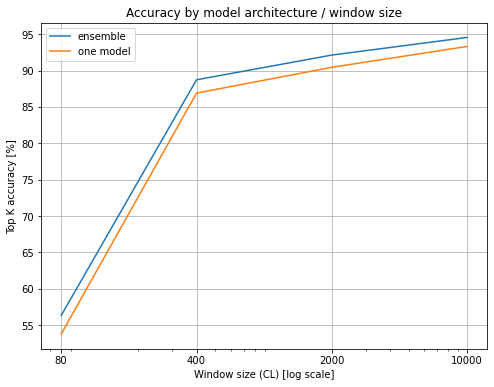

In [6]:
# standard ensembles by size
ensemble_results = np.array([get_topline(f"standard-{s}-ens") for s in SIZES])
one_model_results = np.array([get_topline(f"standard-{s}-1") for s in SIZES])
plt.figure(figsize=(8, 6))
plt.plot(SIZES, 100 * ensemble_results, label="ensemble")
plt.plot(SIZES, 100 * one_model_results, label="one model")
plt.xscale('log')
plt.xticks(SIZES, SIZES)
plt.grid()
plt.title("Accuracy by model architecture / window size")
plt.xlabel("Window size (CL) [log scale]")
plt.ylabel("Top K accuracy [%]")
plt.legend()
plt.show()

In [7]:
one_model_results[SIZES.index(2000)]

0.9044719714465673

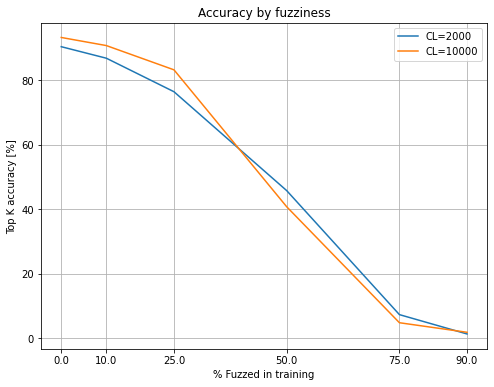

In [8]:
# standard ensembles by size
plt.figure(figsize=(8, 6))
fuzzes_perc = np.array([0] + FUZZES) * 100
for s in 2000, 10000:
    by_fuzz = [one_model_results[SIZES.index(s)]] + [get_topline(f"fuzz-{x}-{s}-1") for x in FUZZES]
    plt.plot(fuzzes_perc, 100 * np.array(by_fuzz), label=f"CL={s}")
plt.xticks(fuzzes_perc, fuzzes_perc)
plt.grid()
plt.title("Accuracy by fuzziness")
plt.xlabel("% Fuzzed in training")
plt.ylabel("Top K accuracy [%]")
plt.legend()
plt.show()

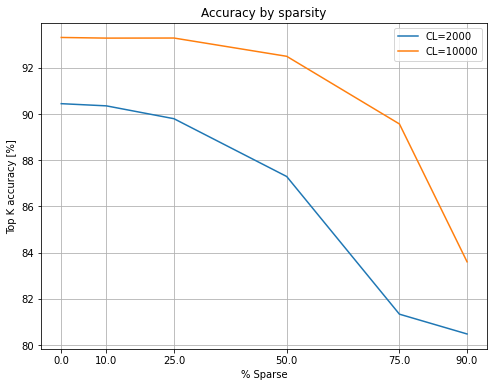

In [9]:
# standard ensembles by size
plt.figure(figsize=(8, 6))
fuzzes_perc = np.array([0] + FUZZES) * 100
for s in 2000, 10000:
    by_fuzz = [one_model_results[SIZES.index(s)]] + [get_topline(f"sparse-{x}-{s}-1") for x in FUZZES]
    plt.plot(fuzzes_perc, 100 * np.array(by_fuzz), label=f"CL={s}")
plt.xticks(fuzzes_perc, fuzzes_perc)
plt.grid()
plt.title("Accuracy by sparsity")
plt.xlabel("% Sparse")
plt.ylabel("Top K accuracy [%]")
plt.legend()
plt.show()